# Proof of Concept
Ariel Silbert

Run with data collected through April 23

In [1]:
import pandas as pd
import json
import os
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

## Load Data
- import json files
- turn into pandas dataframes
- split data into user and video information

In [2]:
#pd.read_json('TikTokImpact-main\TikTok_scrape\output\07032022_fresh\_.maur._\_.maur._.json')
#/Users/arielsilbert/Desktop/MS Data Analytics/Capstone/TikTokImpact-main/TikTok_scrape/output/07032022_fresh/_.maur._
#pd.read_json('_.maur._.json')
data = json.load(open('TikTokImpact-main/TikTok_scrape/output/07032022_fresh/_.maur._/_.maur._.json'))
df = pd.json_normalize(data)
df, data

(  itemList              user.id user.shortId user.uniqueId user.nickname  \
 0       []  6628114544067756038                   _.maur._          Maur   
 
                                    user.avatarLarger  \
 0  https://p16-sign-va.tiktokcdn.com/tos-maliva-a...   
 
                                    user.avatarMedium  \
 0  https://p16-sign-va.tiktokcdn.com/tos-maliva-a...   
 
                                     user.avatarThumb user.signature  \
 0  https://p16-sign-va.tiktokcdn.com/tos-maliva-a...           🌍🤝🇺🇦   
 
    user.createTime  ...  user.privateAccount user.secret  user.isADVirtual  \
 0       1548330054  ...                False       False             False   
 
    user.roomId  stats.followerCount  stats.followingCount  stats.heart  \
 0                              5336                     5      1400000   
 
    stats.heartCount  stats.videoCount  stats.diggCount  
 0           1400000                 3                0  
 
 [1 rows x 28 columns],
 {'user': {'

In [5]:
user_stats = pd.DataFrame()
video_stats = pd.DataFrame()

directory = 'TikTokImpact-main/TikTok_scrape/output'
for datefolder in os.listdir(directory): #go into folders by date
    f = os.path.join(directory, datefolder)
    if os.path.isdir(f): #checking if it is a directory
        for subfolder in os.listdir(f): #go into subfolders
            g = os.path.join(f, subfolder)
            if os.path.isdir(g):
                for json_file in os.listdir(g): #go into video and user stats folders
                    h = os.path.join(g, json_file)
                    if 'OrigSearch' in h:
                        data = json.load(open(h))
                        data['date'] = int(h.split('/')[3].split('_')[0]) #select date from folder name
                        df = pd.json_normalize(data)
                        video_stats = video_stats.append(df) #not an efficient way of loading the data to the df
                    else: 
                        data = json.load(open(h))
                        data['date'] = int(h.split('/')[3].split('_')[0])
                        df = pd.json_normalize(data)
                        user_stats = user_stats.append(df)
    video_stats.to_csv('video_stats.csv', index = False)
    user_stats.to_csv('user_stats.csv', index = False)

In [34]:
#apparently the video_stats file is too big to upload to github in one go
for i in range(6):
    video_stats[i*3900:(i+1)*3900].to_csv(f'video_stats_pt{i}.csv', index = False)

In [6]:
video_stats.iloc[:,:]
#numerical: createTime, itemCommentStatus, video.duration, video.bitrate, 
#music.duration, stats.diggCount, stats.shareCount, stats.commentCount, 
#stats.playCount, authorStats.followingCount, authorStats.followerCount, 
#authorStats.heartCount, authorStats.videoCount, authorStats.diggCount, authorStats.heart

,id,desc,createTime,challenges,originalItem,officalItem,textExtra,secret,forFriend,digged,...,authorStats.followingCount,authorStats.followerCount,authorStats.heartCount,authorStats.videoCount,authorStats.diggCount,authorStats.heart,maskType,effectStickers,author.roomId,warnInfo
0,7069787462242962694,#ukraine #russia,1646063166,"[{'id': '451042', 'title': 'ukraine', 'desc': ...",False,False,"[{'awemeId': '', 'start': 0, 'end': 8, 'hashta...",False,False,False,...,0,165100,4700000,910,548,4700000,NaN,NaN,NaN,NaN
0,7082556143888878890,#ukraine #ukrainevsrussia #ukrainewar #bucha,1649036106,"[{'id': '451042', 'title': 'ukraine', 'desc': ...",False,False,"[{'awemeId': '', 'start': 0, 'end': 8, 'hashta...",False,False,False,...,4,204,1121,145,135,1121,3.0,NaN,NaN,NaN
0,7068388771854634245,I wish this is a bad dream and we will wake up...,1645737509,"[{'id': '861413', 'title': 'stopwar', 'desc': ...",False,False,"[{'awemeId': '', 'start': 56, 'end': 64, 'hash...",False,False,False,...,63,124400,3100000,69,61,3100000,NaN,NaN,NaN,NaN
0,7082576425911323946,its exciting every timeeee,1649040828,NaN,False,False,NaN,False,False,False,...,6098,1652,18800,1662,84700,18800,NaN,NaN,NaN,NaN
0,7071700963953741062,🇺🇦🤝 🇷🇺 #ukraine #supportukraine #fyp #nowar,1646508688,"[{'id': '451042', 'title': 'ukraine', 'desc': ...",False,False,"[{'awemeId': '', 'start': 12, 'end': 20, 'hash...",False,False,False,...,32,10800000,226600000,701,3361,226600000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,7070296231565692161,#foryourpage #vladimirputin #shocking #murtyme...,1646181627,"[{'id': '1598498371111942', 'title': 'foryourp...",False,False,"[{'awemeId': '', 'start': 0, 'end': 12, 'hasht...",False,False,False,...,0,187600,2400000,250,335,2400000,NaN,NaN,NaN,NaN
0,7072706328795368709,Le présentent ukrainien dénonce l'attaque cont...,1646742768,"[{'id': '1494657', 'title': 'wwiii', 'desc': '...",False,False,"[{'awemeId': '', 'start': 56, 'end': 62, 'hash...",False,False,False,...,10,71,1028,7,66,1028,NaN,NaN,NaN,NaN
0,7068763810110164270,Idk how else to say it #ukraine #russia #ww3,1645824828,"[{'id': '451042', 'title': 'ukraine', 'desc': ...",False,False,"[{'awemeId': '', 'start': 23, 'end': 31, 'hash...",False,False,False,...,895,1301,242600,300,7889,242600,NaN,NaN,NaN,NaN
0,7068420650159017262,Dayum #fyp #xyzbca #ukraine #russia,1645744930,"[{'id': '229207', 'title': 'fyp', 'desc': '', ...",False,False,"[{'awemeId': '', 'start': 6, 'end': 10, 'hasht...",False,False,False,...,329,42300,3300000,116,644,3300000,NaN,NaN,NaN,NaN


In [7]:
user_stats.fillna(0)
user_stats.iloc[:,20:]
#numerical columns: 'stats.followerCount', 'stats.followingCount', 'stats.heart', 'stats.heartCount', 'stats.videoCount', 'stats.diggCount'
#Emily to look into what createTime means IRL
#user.relation appears to be all 0s -- unclear what it is
#user.bioLink.risk probably a cybersecurity thing
#user...Setting seem to be T/F values but as numbers?
#diggs used to be likes -- field may not be used anymore, but still exists

,user.stitchSetting,user.privateAccount,user.secret,user.isADVirtual,user.roomId,stats.followerCount,stats.followingCount,stats.heart,stats.heartCount,stats.videoCount,stats.diggCount,user.commerceUserInfo.commerceUser,user.commerceUserInfo.category,user.commerceUserInfo.categoryButton,user.commerceUserInfo.downLoadLink.android,user.commerceUserInfo.downLoadLink.ios,user.showPrivateBanner
0,0.0,False,False,False,,165100.0,0.0,4700000.0,4700000.0,910.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,False,False,False,,204.0,4.0,1121.0,1121.0,145.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,False,False,False,,124400.0,63.0,3100000.0,3100000.0,69.0,0.0,True,Personal Blog,False,NaN,NaN,NaN
0,0.0,False,False,False,,1652.0,6098.0,18800.0,18800.0,1662.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,False,False,False,,10800000.0,32.0,226600000.0,226600000.0,701.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3.0,False,False,False,,187600.0,0.0,2400000.0,2400000.0,250.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,False,False,False,,71.0,10.0,1028.0,1028.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,False,False,False,,1301.0,895.0,242600.0,242600.0,300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,False,False,False,,42300.0,329.0,3300000.0,3300000.0,116.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## Preliminary Statistics
- correlations
- description (mean, std, count, min, max, 25th and 75th %iles)

In [8]:
video_stats.corr().dropna(how='all').dropna(axis=1).iloc[:,:13]

,createTime,duetEnabled,stitchEnabled,date,video.duration,video.bitrate,author.stitchSetting,music.original,music.duration,stats.diggCount,stats.shareCount,stats.commentCount,stats.playCount
createTime,1.000000,-0.042621,-0.082326,0.027976,-0.016843,-0.021221,0.099411,-0.005863,-0.001959,-0.208728,-0.150938,-0.169744,-0.226708
itemCommentStatus,0.029116,-0.085241,-0.082957,-0.010298,-0.023353,-0.040401,0.088502,-0.055152,0.008814,-0.041327,-0.031758,-0.064274,0.010850
duetEnabled,-0.042621,1.000000,0.825618,0.017660,-0.298876,0.040001,-0.295167,0.002775,-0.218807,-0.020370,-0.062157,-0.064404,-0.048756
stitchEnabled,-0.082326,0.825618,1.000000,0.017963,-0.246029,0.046296,-0.263864,0.002533,-0.181193,-0.002354,-0.038635,-0.021150,-0.036343
date,0.027976,0.017660,0.017963,1.000000,-0.018751,0.005747,0.009493,-0.001563,-0.013604,-0.034196,-0.026916,-0.032281,-0.038464
video.height,-0.043187,0.044653,0.047052,-0.023532,0.068440,0.133934,-0.027485,-0.056923,0.057091,0.037691,0.032204,0.013642,0.029110
video.width,0.033337,-0.043006,-0.031335,-0.018245,0.070575,0.072087,0.023129,0.006676,0.023747,-0.048142,-0.049789,-0.041900,-0.066341
video.duration,-0.016843,-0.298876,-0.246029,-0.018751,1.000000,-0.105105,-0.036556,-0.039016,0.686298,0.039780,0.174949,0.043314,0.058061
video.bitrate,-0.021221,0.040001,0.046296,0.005747,-0.105105,1.000000,-0.014631,-0.055697,-0.081560,0.093263,0.020164,0.058157,0.078349
author.verified,-0.102834,-0.017283,0.041561,0.042344,0.166687,-0.074742,-0.129818,0.108843,0.076643,0.028609,0.096632,0.091445,0.096708


In [9]:
video_stats.corr().dropna(how='all').dropna(axis=1).iloc[:,13:]

,authorStats.followingCount,authorStats.followerCount,authorStats.heartCount,authorStats.videoCount,authorStats.diggCount,authorStats.heart
createTime,0.030845,-0.126420,-0.098546,-0.049166,-0.038340,-0.098546
itemCommentStatus,0.015420,-0.046224,-0.035905,-0.024001,-0.021127,-0.035905
duetEnabled,-0.040957,0.027663,-0.002906,-0.036808,0.076063,-0.002906
stitchEnabled,-0.055364,0.067409,0.031208,-0.001696,0.099710,0.031208
date,0.010535,0.039648,0.038690,0.032673,0.008974,0.038690
video.height,-0.023603,0.051482,0.030064,0.055559,0.024534,0.030064
video.width,0.024792,-0.001361,0.002560,-0.010827,-0.009951,0.002560
video.duration,-0.041741,0.123579,0.053854,0.055312,-0.090197,0.053854
video.bitrate,0.000553,-0.017561,-0.064075,-0.077927,0.067344,-0.064075
author.verified,-0.049277,0.533290,0.431921,0.457954,-0.107766,0.431921


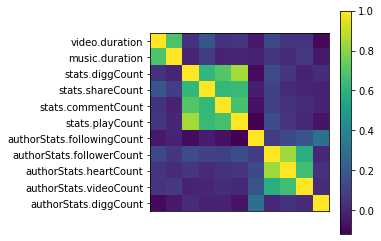

In [103]:
import matplotlib.pyplot as plt

plt.matshow(video_stats[v_cols].corr())
#plt.xticks(range(len(v_cols)), v_cols, fontsize=8, rotation=45)
plt.xticks([])
plt.yticks(range(len(v_cols)), v_cols, fontsize=10)
plt.colorbar()
plt.show()

In [10]:
video_stats.describe().iloc[:,:13]

,createTime,itemCommentStatus,date,video.height,video.width,video.duration,video.bitrate,author.relation,author.commentSetting,author.duetSetting,author.stitchSetting,music.duration,stats.diggCount
count,1.987000e+04,19870.000000,1.987000e+04,19870.000000,19870.000000,19870.000000,1.979700e+04,19870.0,19870.000000,19870.000000,19870.000000,19868.000000,1.987000e+04
mean,1.646293e+09,0.039104,1.611756e+07,986.748968,574.816608,27.443533,1.032938e+06,0.0,0.011374,0.198842,0.237494,38.072428,7.358321e+05
std,2.663534e+06,0.340278,7.836725e+06,142.717635,72.411486,30.759785,6.881344e+05,0.0,0.152723,0.707920,0.774560,40.286891,1.024170e+06
min,1.578792e+09,0.000000,1.042022e+06,0.000000,0.000000,0.000000,5.501600e+04,0.0,0.000000,0.000000,0.000000,2.000000,0.000000e+00
25%,1.645737e+09,0.000000,1.004202e+07,1024.000000,576.000000,10.000000,5.749310e+05,0.0,0.000000,0.000000,0.000000,14.000000,1.823500e+05
50%,1.645953e+09,0.000000,1.703202e+07,1024.000000,576.000000,17.000000,8.615830e+05,0.0,0.000000,0.000000,0.000000,27.000000,3.816000e+05
75%,1.646958e+09,0.000000,2.104202e+07,1024.000000,576.000000,31.000000,1.299922e+06,0.0,0.000000,0.000000,0.000000,58.000000,9.031000e+05
max,1.650577e+09,3.000000,3.103202e+07,1344.000000,1332.000000,600.000000,8.313859e+06,0.0,3.000000,3.000000,3.000000,981.000000,1.070000e+07


In [11]:
video_stats.describe().iloc[:,13:]

,stats.shareCount,stats.commentCount,stats.playCount,authorStats.followingCount,authorStats.followerCount,authorStats.heartCount,authorStats.videoCount,authorStats.diggCount,authorStats.heart,maskType
count,19870.000000,19870.000000,1.987000e+04,19870.000000,1.987000e+04,1.987000e+04,19870.000000,19870.000000,1.987000e+04,8.00000
mean,19185.835682,12236.641671,6.423756e+06,563.093306,5.560369e+05,1.888577e+07,425.050629,14747.706140,1.888577e+07,3.75000
std,36817.407433,21879.462847,8.034207e+06,1382.071238,1.167972e+06,5.603230e+07,813.337660,35223.415263,5.603230e+07,0.46291
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000e+00,3.00000
25%,1143.250000,1181.250000,1.200000e+06,21.000000,6.253250e+03,3.235250e+05,31.000000,330.000000,3.235250e+05,3.75000
50%,6272.000000,5814.500000,4.000000e+06,112.000000,6.010000e+04,2.000000e+06,124.000000,2554.500000,2.000000e+06,4.00000
75%,19900.000000,15175.000000,8.800000e+06,542.000000,5.726750e+05,1.220000e+07,426.000000,12375.000000,1.220000e+07,4.00000
max,533400.000000,362500.000000,7.960000e+07,10000.000000,2.190000e+07,2.000000e+09,11100.000000,358300.000000,2.000000e+09,4.00000


In [12]:
user_stats.describe()

,date,user.createTime,user.relation,user.bioLink.risk,user.commentSetting,user.duetSetting,user.stitchSetting,stats.followerCount,stats.followingCount,stats.heart,stats.heartCount,stats.videoCount,stats.diggCount
count,1.639900e+04,1.362900e+04,16326.0,4968.000000,16326.000000,16326.000000,16326.000000,1.632600e+04,16326.000000,1.632600e+04,1.632600e+04,16326.000000,16326.000000
mean,1.589983e+07,1.596278e+09,0.0,1.935990,0.012679,0.234044,0.275695,3.517773e+05,608.430234,1.130337e+07,1.130337e+07,314.641308,508.101127
std,7.768775e+06,4.342350e+07,0.0,1.505218,0.159320,0.761988,0.827109,1.074732e+06,1470.525694,5.195411e+07,5.195411e+07,638.104142,5712.605420
min,1.042022e+06,1.436840e+09,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.004202e+07,1.574040e+09,0.0,0.000000,0.000000,0.000000,0.000000,3.411250e+03,25.000000,2.149500e+05,2.149500e+05,26.000000,0.000000
50%,1.703202e+07,1.599663e+09,0.0,3.000000,0.000000,0.000000,0.000000,2.965000e+04,127.000000,1.200000e+06,1.200000e+06,84.000000,0.000000
75%,2.104202e+07,1.631311e+09,0.0,3.000000,0.000000,0.000000,0.000000,2.027500e+05,505.000000,4.900000e+06,4.900000e+06,302.000000,0.000000
max,3.103202e+07,1.649861e+09,0.0,5.000000,3.000000,3.000000,3.000000,2.190000e+07,10000.000000,2.000000e+09,2.000000e+09,11100.000000,258800.000000


In [36]:
video_stats[v_cols].describe()

,video.duration,music.duration,stats.diggCount,stats.shareCount,stats.commentCount,stats.playCount,authorStats.followingCount,authorStats.followerCount,authorStats.heartCount,authorStats.videoCount,authorStats.diggCount
count,19870.000000,19868.000000,1.987000e+04,19870.000000,19870.000000,1.987000e+04,19870.000000,1.987000e+04,1.987000e+04,19870.000000,19870.000000
mean,27.443533,38.072428,7.358321e+05,19185.835682,12236.641671,6.423756e+06,563.093306,5.560369e+05,1.888577e+07,425.050629,14747.706140
std,30.759785,40.286891,1.024170e+06,36817.407433,21879.462847,8.034207e+06,1382.071238,1.167972e+06,5.603230e+07,813.337660,35223.415263
min,0.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,10.000000,14.000000,1.823500e+05,1143.250000,1181.250000,1.200000e+06,21.000000,6.253250e+03,3.235250e+05,31.000000,330.000000
50%,17.000000,27.000000,3.816000e+05,6272.000000,5814.500000,4.000000e+06,112.000000,6.010000e+04,2.000000e+06,124.000000,2554.500000
75%,31.000000,58.000000,9.031000e+05,19900.000000,15175.000000,8.800000e+06,542.000000,5.726750e+05,1.220000e+07,426.000000,12375.000000
max,600.000000,981.000000,1.070000e+07,533400.000000,362500.000000,7.960000e+07,10000.000000,2.190000e+07,2.000000e+09,11100.000000,358300.000000


In [38]:
video_stats[v_cols].corr().to_csv('test.csv')

## PCA
- used imcremental PCA because of the size of the dataset

In [28]:
video_stats[v_cols].dropna()

,video.duration,music.duration,stats.diggCount,stats.shareCount,stats.commentCount,stats.playCount,authorStats.followingCount,authorStats.followerCount,authorStats.heartCount,authorStats.videoCount,authorStats.diggCount
0,20,60.0,863800,78200,11400,6700000,0,165100,4700000,910,548
0,104,104.0,152,8,15,6913,4,204,1121,145,135
0,9,11.0,2300000,18900,82000,14700000,63,124400,3100000,69,61
0,15,60.0,4,0,0,17,6098,1652,18800,1662,84700
0,42,42.0,1900000,27400,44700,10500000,32,10800000,226600000,701,3361
...,...,...,...,...,...,...,...,...,...,...,...
0,17,60.0,731500,6125,0,22500000,0,187600,2400000,250,335
0,22,22.0,554,10,60,29300,10,71,1028,7,66
0,9,9.0,232600,2236,2957,1300000,895,1301,242600,300,7889
0,12,45.0,276900,3800,4215,1000000,329,42300,3300000,116,644


In [42]:
v_cols = ['video.duration', 'music.duration', 'stats.diggCount', 'stats.shareCount', 'stats.commentCount', 
          'stats.playCount', 'authorStats.followingCount', 'authorStats.followerCount', 'authorStats.heartCount', 
          'authorStats.videoCount', 'authorStats.diggCount']
X = video_stats[v_cols].dropna()
X = StandardScaler().fit_transform(X)

pca = IncrementalPCA(n_components=11, batch_size = 100)

X_sparse = sparse.csr_matrix(X)
X_transformed = pca.fit_transform(X_sparse)
X_transformed.shape

print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))
print(pca.singular_values_)

[0.28634686 0.21835708 0.15396535 0.11249087 0.06408779 0.0413361
 0.03846984 0.03099678 0.02687927 0.01404878 0.01302127] 1.0000000000000124
[250.16101497 218.45252054 183.43614633 156.79494591 118.34803461
  95.04694645  91.69246208  82.3060361   76.6447087   55.41059182
  53.34578199]


In [45]:
PC_nums = []
for i in range(11):
    PC_nums.append(f'PC {i+1}')

pd.DataFrame(pca.components_,columns=v_cols,index = PC_nums).to_csv('pca.csv')
pd.DataFrame(pca.components_,columns=v_cols,index = PC_nums)

,video.duration,music.duration,stats.diggCount,stats.shareCount,stats.commentCount,stats.playCount,authorStats.followingCount,authorStats.followerCount,authorStats.heartCount,authorStats.videoCount,authorStats.diggCount
PC 1,0.107328,0.060245,0.496000,0.448768,0.465062,0.495995,-0.050638,0.198530,0.147732,0.104592,-0.020131
PC 2,0.099035,0.097898,-0.136647,-0.120353,-0.129593,-0.136655,0.182607,0.532404,0.568766,0.517357,0.063478
PC 3,0.672346,0.671359,-0.087905,0.043707,-0.077669,-0.064288,-0.144960,-0.050218,-0.101905,-0.066082,-0.197834
PC 4,0.126076,0.184790,0.045569,0.100704,0.038134,-0.023531,0.648157,-0.143088,-0.117669,-0.057296,0.691390
PC 5,-0.024554,-0.048675,-0.064269,0.128099,0.062234,-0.002064,0.689505,-0.125034,-0.090975,0.110412,-0.679038
PC 6,-0.093538,0.065765,-0.182192,0.186838,0.267895,-0.170846,-0.203823,-0.409990,-0.216643,0.743197,0.094629
PC 7,0.148820,-0.278003,-0.369251,0.741373,0.006609,-0.351150,-0.068642,0.153646,0.089881,-0.230088,0.043580
PC 8,0.001490,0.062648,-0.172980,-0.327184,0.818400,-0.322380,0.025235,0.071610,0.137619,-0.245554,-0.019835
PC 9,0.689336,-0.642607,0.042891,-0.247486,0.058489,0.084416,0.017858,-0.069413,-0.097497,0.147333,0.043427
PC 10,0.057549,-0.031845,0.568035,0.053109,-0.102201,-0.486167,-0.017193,-0.443568,0.470226,-0.043996,-0.057366


In [16]:
u_cols = ['stats.followerCount', 'stats.followingCount', 'stats.heart', 'stats.videoCount', 'stats.diggCount']
X2 = user_stats[u_cols]
X2 = X2.dropna()

X2 = StandardScaler().fit_transform(X2)

pca2 = IncrementalPCA(n_components=3, batch_size = 200)

X2_sparse = sparse.csr_matrix(X2)
X2_transformed = pca2.fit_transform(X2_sparse)
X2_transformed.shape

print(pca2.explained_variance_ratio_, sum(pca2.explained_variance_ratio_))
print(pca2.singular_values_)

[0.46441916 0.22351996 0.17198   ] 0.859919121384738
[194.70628173 135.07751204 118.48513609]


In [17]:
PC_nums = []
for i in range(3):
    PC_nums.append(f'PC {i+1}')

pd.DataFrame(pca2.components_,columns=u_cols,index = PC_nums)

,stats.followerCount,stats.followingCount,stats.heart,stats.videoCount,stats.diggCount
PC 1,0.588486,0.163696,0.591602,0.526193,0.004139
PC 2,-0.159176,0.654065,-0.111438,0.094133,0.724971
PC 3,-0.120329,0.713331,-0.085484,0.014158,-0.684961


## F Regression

In [31]:
for i in range(len(v_cols)):
    print(f'y = {v_cols[i]} \nf statistic: {f_regression(X, X[:,i])[0]} \np values: {f_regression(X, X[:,i])[1]}')

y = video.duration 
f statistic: [-3.82344061e+17  1.76881997e+04  3.14867344e+01  6.27255820e+02
  3.73410978e+01  6.71974944e+01  3.46793530e+01  3.08097247e+02
  5.77837305e+01  6.09654307e+01  1.62945186e+02] 
p values: [1.00000000e+000 0.00000000e+000 2.03484827e-008 2.56156497e-136
 1.01019623e-009 2.60390993e-016 3.94994110e-009 1.86445745e-068
 3.05550599e-014 6.09540905e-015 3.59986287e-037]
y = music.duration 
f statistic: [ 1.76881997e+04 -8.77142257e+17  1.18837830e-01  1.38903370e+02
  1.92196892e+00  1.28528646e-03  1.19070460e+00  8.01590145e+01
  1.22312410e+01  8.59359117e+01  3.69744744e+01] 
p values: [0.00000000e+00 1.00000000e+00 7.30302040e-01 5.90874146e-32
 1.65655329e-01 9.71401613e-01 2.75200710e-01 3.75222527e-19
 4.70985958e-04 2.04347590e-20 1.21872194e-09]
y = stats.diggCount 
f statistic: [ 3.14867344e+01  1.18837830e-01 -2.23671275e+19  1.26345157e+04
  1.90461586e+04  4.91734844e+04  1.51124781e+02  3.83363962e+02
  6.41727211e+01  2.33970297e+00  1.455

In [19]:
for i in range(len(u_cols)):
    print(f'y = {u_cols[i]} \nf statistics: {f_regression(X2, X2[:,i])[0]}, \np values: {f_regression(X2, X2[:,i])[1]}')

y = stats.followerCount 
f statistics: [-3.06319835e+18  1.00417995e+02  3.22821256e+04  6.92508847e+03
  1.15246268e+01], 
p values: [1.00000000e+00 1.44358464e-23 0.00000000e+00 0.00000000e+00
 6.88436973e-04]
y = stats.followingCount 
f statistics: [1.00417995e+02 2.10047887e+18 2.51456362e+02 6.19277085e+02
 2.54867524e+02], 
p values: [1.44358464e-023 0.00000000e+000 3.28504915e-056 3.36579010e-134
 6.08514752e-057]
y = stats.heart 
f statistics: [ 3.22821256e+04  2.51456362e+02 -9.18959504e+18  7.33478804e+03
  4.77299056e+00], 
p values: [0.00000000e+00 3.28504915e-56 1.00000000e+00 0.00000000e+00
 2.89237382e-02]
y = stats.videoCount 
f statistics: [6.92508847e+03 6.19277085e+02 7.33478804e+03 1.13102708e+18
 1.05453032e+01], 
p values: [0.0000000e+000 3.3657901e-134 0.0000000e+000 0.0000000e+000
 1.1671887e-003]
y = stats.diggCount 
f statistics: [ 1.15246268e+01  2.54867524e+02  4.77299056e+00  1.05453032e+01
 -8.35417731e+17], 
p values: [6.88436973e-04 6.08514752e-57 2.8923

## With New Features

In [46]:
all_stats = pd.read_pickle("allfeatures.pkl")

In [69]:
all_stats['scrape_week']

0        14
1        14
2        14
3        14
4        14
         ..
21437    11
21438    11
21439    11
21440    11
21441    11
Name: scrape_week, Length: 21442, dtype: object

In [51]:
all_stats.columns

Index(['video_duration', 'authorStats_diggCount', 'authorStats_followingCount',
       'authorStats_followerCount', 'authorStats_heartCount',
       'stats_playCount', 'authorStats_videoCount', 'duetEnabled',
       'stitchEnabled', 'shareEnabled', 'stats_shareCount',
       'stats_commentCount', 'stats_diggCount', 'music_original',
       'scrape_date', 'scrape_week', 'daysFromPost', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')

In [72]:
all_stats[['daysFromPost', '0', '1', '2', '3', '4',
          '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
          '18', '19', '20', '21', '22', '23', '24']].describe()

,daysFromPost,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
count,21442.000000,21442.000000,21442.000000,21442.000000,21442.000000,21442.000000,21442.000000,21442.000000,21442.000000,21442.000000,...,21442.000000,21442.000000,21442.000000,21442.000000,21442.000000,21442.000000,21442.000000,21442.000000,21442.000000,21442.000000
mean,27.462037,0.033536,0.153053,-0.244840,-0.322942,-0.279521,-0.388651,0.463738,-0.315203,0.080537,...,0.007472,0.095182,-0.016119,0.051897,-0.092591,-0.038853,0.001747,-0.166478,-0.576860,-0.013107
std,31.959043,0.452952,0.425553,0.487727,0.388891,0.543394,0.443839,0.593359,0.559090,0.404715,...,0.482762,0.337241,0.421616,0.507107,0.421202,0.398939,0.472493,0.385215,0.637590,0.443228
min,-1.000000,-1.877400,-3.018100,-2.471200,-2.916100,-3.027100,-2.396600,-2.187800,-3.047800,-2.205300,...,-3.111600,-2.094000,-1.694900,-3.273000,-2.152300,-1.884700,-3.005900,-2.405400,-3.147100,-2.108900
25%,9.000000,-0.218990,0.000000,-0.485754,-0.527875,-0.492263,-0.670100,0.000000,-0.629330,-0.125107,...,-0.153027,-0.067542,-0.255977,-0.187875,-0.349521,-0.283514,-0.188670,-0.375350,-1.032550,-0.247790
50%,24.000000,0.000000,0.164130,-0.187452,-0.302053,-0.182044,-0.370015,0.496928,-0.289084,0.051910,...,0.014935,0.075051,0.000000,0.000000,-0.071298,-0.015077,0.000000,-0.106015,-0.579590,0.000000
75%,41.000000,0.298615,0.398975,0.000000,-0.033051,0.000000,-0.023455,0.856947,0.000000,0.311491,...,0.258326,0.298324,0.214627,0.332827,0.108672,0.152041,0.285109,0.035340,-0.003693,0.185487
max,794.000000,2.716400,1.975000,1.841000,2.008300,1.911600,1.840600,2.382700,3.060100,2.674000,...,2.484000,1.704000,1.718005,2.499500,2.297800,2.534800,1.733700,2.095800,2.677600,2.032500


In [74]:
all_stats[['daysFromPost', '0', '1', '2', '3', '4',
          '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
          '18', '19', '20', '21', '22', '23', '24']].describe().to_csv('new_desc.csv')

In [110]:
all_stats.corr().loc[:,['daysFromPost', '0', '1', '2', '3', '4',
                        '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
                        '18', '19', '20', '21', '22', '23', '24']]

,daysFromPost,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
video_duration,0.023253,0.051214,-0.010530,-0.027924,-0.007864,0.011924,-0.096890,-0.012737,-0.046866,0.110353,...,-0.011470,-0.048881,0.122726,-0.017703,-0.034863,0.002116,-0.047157,-0.042253,-0.103070,-0.007689
authorStats_diggCount,0.027028,-0.026383,0.031974,0.052030,0.022455,0.043917,0.065973,0.103891,0.061121,-0.108413,...,0.094847,0.056850,-0.123550,-0.024587,-0.007851,0.023196,0.020466,0.026424,0.130749,-0.097968
authorStats_followingCount,-0.049204,-0.016917,-0.016728,0.038271,0.054161,0.016331,0.055028,0.002377,0.054034,-0.059734,...,0.063657,0.012248,-0.031245,-0.015516,0.036279,0.023607,0.019070,0.006001,0.085691,-0.071749
authorStats_followerCount,0.121396,-0.002492,0.134807,0.025085,0.010728,0.004985,-0.055422,0.120596,-0.000604,0.082518,...,0.050371,0.002486,-0.075883,-0.045512,-0.071746,-0.041177,-0.006112,0.033144,-0.033636,-0.186624
authorStats_heartCount,0.087917,-0.024083,0.124746,0.031696,-0.003502,-0.007991,-0.026540,0.107015,0.014831,0.039381,...,0.009632,-0.006383,-0.064724,-0.028956,-0.069008,-0.010969,0.011101,0.019045,-0.024059,-0.131681
stats_playCount,0.262016,-0.016133,0.096053,-0.007812,-0.020239,0.106971,-0.067754,0.130757,0.036340,0.061260,...,0.036456,-0.055950,0.019522,-0.098057,-0.082320,-0.059221,0.070103,0.068361,-0.125242,-0.032729
authorStats_videoCount,0.046816,0.010022,0.105840,0.093051,0.006999,-0.003005,-0.065079,0.145725,-0.008125,-0.007161,...,-0.014250,0.011807,-0.044644,-0.045702,-0.129640,0.044181,0.018507,0.017228,-0.049865,-0.162341
duetEnabled,0.024362,-0.043307,0.028205,-0.011608,0.019677,0.002559,0.026180,0.012985,-0.000496,-0.001840,...,0.048192,0.038659,-0.052724,0.010653,0.024638,-0.019676,0.032830,0.018857,0.041134,-0.019692
stitchEnabled,0.057590,-0.061034,0.072195,-0.004163,0.017802,0.027775,-0.013086,0.046922,-0.010424,0.003339,...,0.066279,0.044472,-0.067278,-0.004686,0.014054,-0.014955,0.034012,0.041519,0.015000,-0.026617
shareEnabled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
all_stats.corr().loc[:,['daysFromPost', '0', '1', '2', '3', '4',
                        '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
                        '18', '19', '20', '21', '22', '23', '24']].to_csv('new_corr.csv')

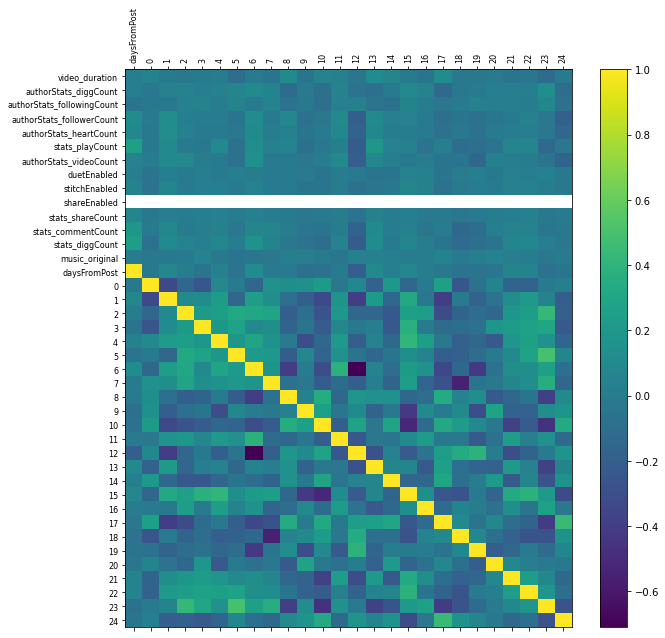

In [167]:
plt.figure(figsize=(10,10))
plt.matshow(all_stats.corr().loc[:,['daysFromPost', '0', '1', '2', '3', '4',
                        '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
                        '18', '19', '20', '21', '22', '23', '24']], fignum=1, aspect='auto')
plt.xticks(range(len(['daysFromPost', '0', '1', '2', '3', '4',
                        '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
                        '18', '19', '20', '21', '22', '23', '24'])), 
           ['daysFromPost', '0', '1', '2', '3', '4',
                        '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
                        '18', '19', '20', '21', '22', '23', '24'], fontsize=8, rotation=90)
plt.yticks(range(len(list(test.index))), list(test.index), fontsize=8)
plt.colorbar()
plt.show()

## Following verified/unverified user

In [82]:
video_stats[video_stats['author.verified'] == False]

,id,desc,createTime,challenges,originalItem,officalItem,textExtra,secret,forFriend,digged,...,authorStats.followingCount,authorStats.followerCount,authorStats.heartCount,authorStats.videoCount,authorStats.diggCount,authorStats.heart,maskType,effectStickers,author.roomId,warnInfo
0,7069787462242962694,#ukraine #russia,1646063166,"[{'id': '451042', 'title': 'ukraine', 'desc': ...",False,False,"[{'awemeId': '', 'start': 0, 'end': 8, 'hashta...",False,False,False,...,0,165100,4700000,910,548,4700000,NaN,NaN,NaN,NaN
0,7082556143888878890,#ukraine #ukrainevsrussia #ukrainewar #bucha,1649036106,"[{'id': '451042', 'title': 'ukraine', 'desc': ...",False,False,"[{'awemeId': '', 'start': 0, 'end': 8, 'hashta...",False,False,False,...,4,204,1121,145,135,1121,3.0,NaN,NaN,NaN
0,7068388771854634245,I wish this is a bad dream and we will wake up...,1645737509,"[{'id': '861413', 'title': 'stopwar', 'desc': ...",False,False,"[{'awemeId': '', 'start': 56, 'end': 64, 'hash...",False,False,False,...,63,124400,3100000,69,61,3100000,NaN,NaN,NaN,NaN
0,7082576425911323946,its exciting every timeeee,1649040828,NaN,False,False,NaN,False,False,False,...,6098,1652,18800,1662,84700,18800,NaN,NaN,NaN,NaN
0,7071700963953741062,🇺🇦🤝 🇷🇺 #ukraine #supportukraine #fyp #nowar,1646508688,"[{'id': '451042', 'title': 'ukraine', 'desc': ...",False,False,"[{'awemeId': '', 'start': 12, 'end': 20, 'hash...",False,False,False,...,32,10800000,226600000,701,3361,226600000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,7070296231565692161,#foryourpage #vladimirputin #shocking #murtyme...,1646181627,"[{'id': '1598498371111942', 'title': 'foryourp...",False,False,"[{'awemeId': '', 'start': 0, 'end': 12, 'hasht...",False,False,False,...,0,187600,2400000,250,335,2400000,NaN,NaN,NaN,NaN
0,7072706328795368709,Le présentent ukrainien dénonce l'attaque cont...,1646742768,"[{'id': '1494657', 'title': 'wwiii', 'desc': '...",False,False,"[{'awemeId': '', 'start': 56, 'end': 62, 'hash...",False,False,False,...,10,71,1028,7,66,1028,NaN,NaN,NaN,NaN
0,7068763810110164270,Idk how else to say it #ukraine #russia #ww3,1645824828,"[{'id': '451042', 'title': 'ukraine', 'desc': ...",False,False,"[{'awemeId': '', 'start': 23, 'end': 31, 'hash...",False,False,False,...,895,1301,242600,300,7889,242600,NaN,NaN,NaN,NaN
0,7068420650159017262,Dayum #fyp #xyzbca #ukraine #russia,1645744930,"[{'id': '229207', 'title': 'fyp', 'desc': '', ...",False,False,"[{'awemeId': '', 'start': 6, 'end': 10, 'hasht...",False,False,False,...,329,42300,3300000,116,644,3300000,NaN,NaN,NaN,NaN


In [83]:
video_stats[video_stats['author.verified'] == True]

,id,desc,createTime,challenges,originalItem,officalItem,textExtra,secret,forFriend,digged,...,authorStats.followingCount,authorStats.followerCount,authorStats.heartCount,authorStats.videoCount,authorStats.diggCount,authorStats.heart,maskType,effectStickers,author.roomId,warnInfo
0,7074329793659178286,The city of #Odessa has built walls of sandbag...,1647120761,"[{'id': '3210', 'title': 'odessa', 'desc': '',...",False,False,"[{'awemeId': '', 'start': 12, 'end': 19, 'hash...",False,False,False,...,17,1700000,97000000,3285,731,97000000,NaN,NaN,NaN,NaN
0,7075002534464589102,The mayor of #Kyiv said the air strike killed ...,1647277395,"[{'id': '5030717', 'title': 'kyiv', 'desc': ''...",False,False,"[{'awemeId': '', 'start': 13, 'end': 18, 'hash...",False,False,False,...,17,1700000,97000000,3285,731,97000000,NaN,NaN,NaN,NaN
0,7071955969684655406,@balenciaga Winter 22 #fashionforyou #tiktokfa...,1646568066,"[{'id': '31011076', 'title': 'fashionforyou', ...",False,False,"[{'awemeId': '', 'start': 0, 'end': 11, 'hasht...",False,False,False,...,1584,145800,2300000,127,38300,2300000,NaN,NaN,NaN,NaN
0,7068134996468567342,#Explosions heard in #Kyiv as #Putin announces...,1645678422,"[{'id': '54586', 'title': 'explosions', 'desc'...",False,False,"[{'awemeId': '', 'start': 0, 'end': 11, 'hasht...",False,False,False,...,11,2500000,70600000,777,113,70600000,NaN,NaN,NaN,NaN
0,7070158111876861230,Videos show a massive #explosion at Kharkiv’s ...,1646149466,"[{'id': '75604', 'title': 'explosion', 'desc':...",False,False,"[{'awemeId': '', 'start': 22, 'end': 32, 'hash...",False,False,False,...,11,2500000,70600000,777,113,70600000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,7070523638717517102,Reporters shook by war in a “relatively civili...,1646234571,"[{'id': '229207', 'title': 'fyp', 'desc': '', ...",False,False,"[{'awemeId': '', 'start': 69, 'end': 73, 'hash...",False,False,False,...,42,3500000,62500000,526,12,62500000,NaN,NaN,NaN,NaN
0,7029743726360628481,Loved this from the Together Academy. #allblac...,1636739757,"[{'id': '398505', 'title': 'allblacks', 'desc'...",False,False,"[{'awemeId': '', 'start': 38, 'end': 48, 'hash...",False,False,False,...,83,625700,10600000,207,52,10600000,NaN,NaN,NaN,NaN
0,7074253965654904106,#US citizens are heading to #Ukraine to fight ...,1647103105,"[{'id': '13262', 'title': 'us', 'desc': '', 'p...",False,False,"[{'awemeId': '', 'start': 0, 'end': 3, 'hashta...",False,False,False,...,78,166200,6300000,530,131,6300000,NaN,NaN,NaN,NaN
0,7055794052230319406,#US #Prsident #Biden shades a reporter after t...,1642805071,"[{'id': '13262', 'title': 'us', 'desc': '', 'p...",False,False,"[{'awemeId': '', 'start': 0, 'end': 3, 'hashta...",False,False,False,...,78,166200,6300000,530,131,6300000,NaN,NaN,NaN,NaN
